In [11]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import mpld3

In [16]:
import json
import glob
from os import path
data_dir = "../scripts/N-T_search/data/"
settings_files = glob.glob(path.join(data_dir, '*settings.json'))
out_files = glob.glob(path.join(data_dir, '*output.npy'))
target_files = glob.glob(path.join(data_dir, '*target.npy'))
time_files = glob.glob(path.join(data_dir, '*time.npy'))

name_list = []
output_list = []
target_list = []
time_list = []
mse_list = []
regcoef_list = []
N_list = []
T_list = []

for outputf, targetf, timef, settingf  in zip(out_files, target_files, time_files, settings_files):
    name = outputf.split('/')[-1].split('.')[0]
    name_list.append(name)
    output_list.append(np.load(outputf))
    target_list.append(np.load(targetf))
    time_list.append(np.load(timef))
    settings = json.load(open(settingf))
    mse_list.append(settings["mse"])
    regcoef_list.append(settings["reg_coef"])
    N_list.append(int(settings["N"]))
    T_list.append(int(settings["training_time"])-int(settings["init_time"]))

In [17]:
N =[]
T =[]
for n, t in zip(N_list, T_list):
    if N.count(n) is 0:
        N.append(n)
    if T.count(t) is 0:
        T.append(t)

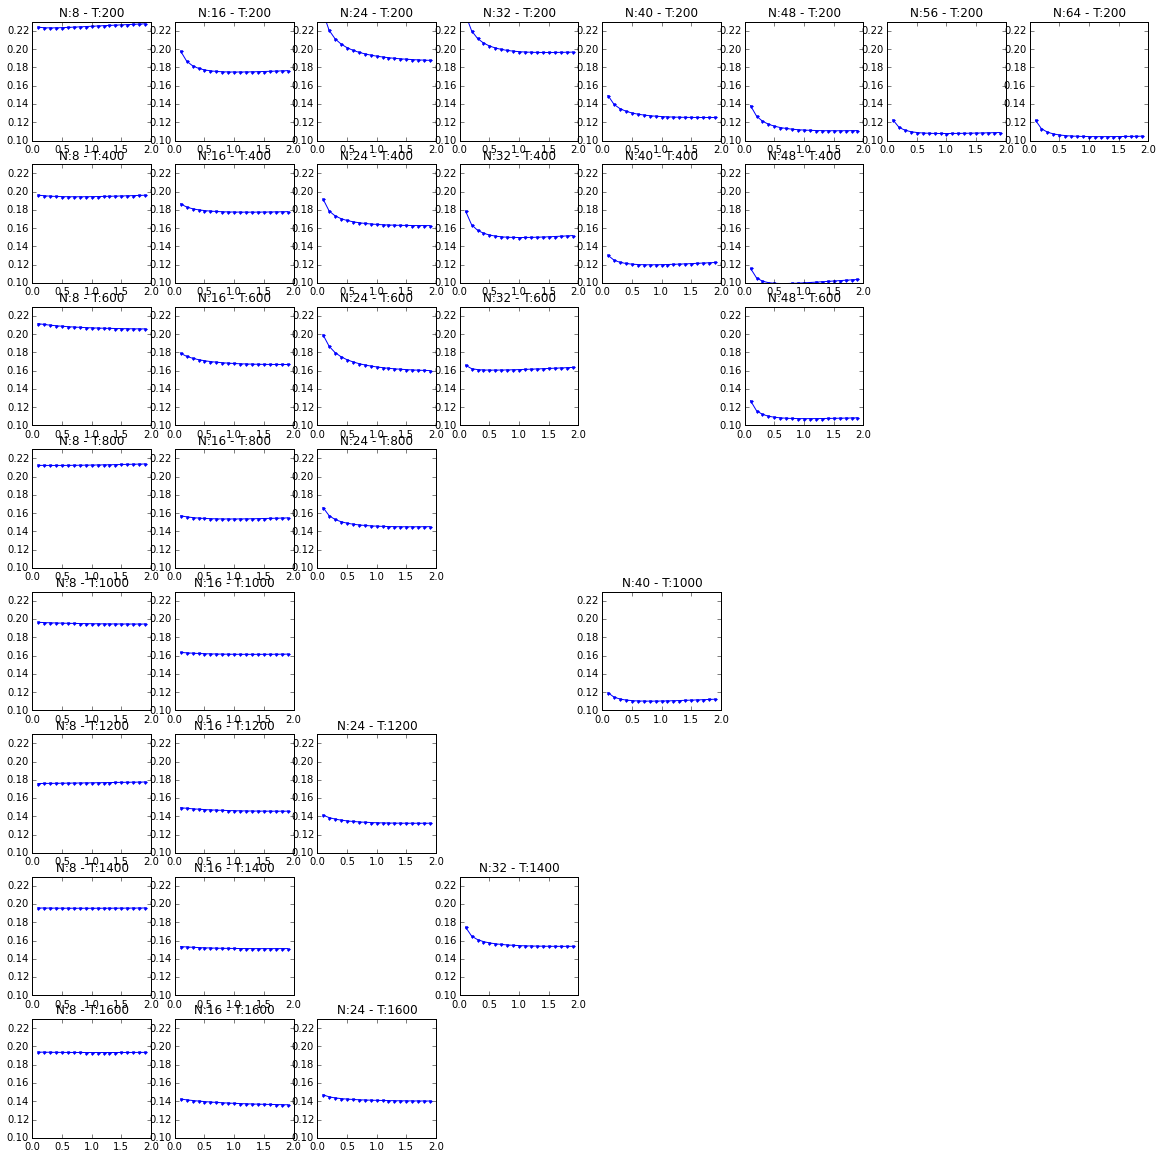

In [18]:
mse_search_files = glob.glob(path.join(data_dir, '*search_mse.npy'))
regcoef_search_files = glob.glob(path.join(data_dir, '*search_regcoef.npy'))
i = 0
plt.figure(figsize=(20,20))
for regcoef_search_f, mse_search_f in zip(regcoef_search_files, mse_search_files):
    x = np.load(regcoef_search_f)
    y = np.load(mse_search_f)
    plot_row = len(T)
    plot_col = len(N)
    n = N_list[i]
    t = T_list[i]
    plot_index = plot_col * T.index(t) + N.index(n) + 1
    plt.subplot(plot_row, plot_col, plot_index)
    plt.plot(x,y, '.-')
    plt.ylim(0.10, 0.23)
    plt.title("N:%d - T:%d" % (n, t))
    i += 1
plt.show()

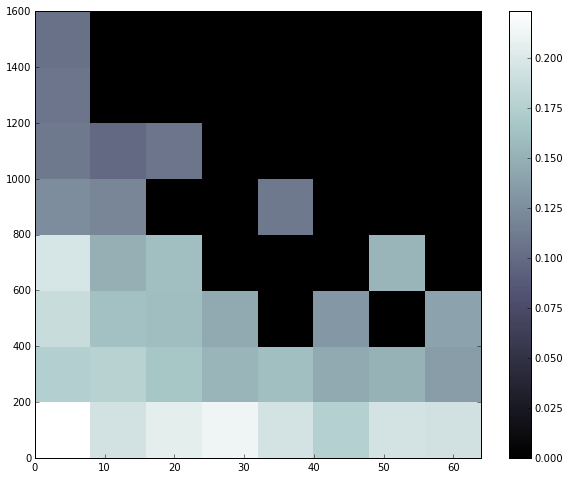

In [19]:
plt.figure(figsize=(10,8))
MSE = [[0 for j in range(len(T))] for i in range(len(N)) ]
for n, t, mse in zip(N_list, T_list, mse_list):
    n_idx = N.index(n)
    t_idx = T.index(t)
    MSE[n_idx][t_idx] = mse
    plt.plot()
N_mesh, T_mesh = np.meshgrid([0] + N, [0] + T)
MSE_mesh = np.array(MSE)
plt.pcolor(N_mesh, T_mesh, MSE_mesh)
plt.colorbar()
plt.bone()
plt.xlim(0,64)
plt.show()

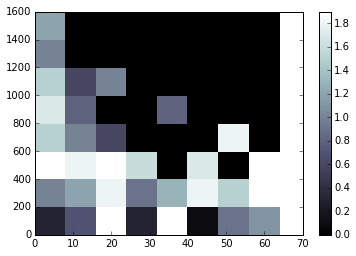

In [6]:
RC = [[0 for j in range(len(T))] for i in range(len(N)) ]
for n, t, regcoef in zip(N_list, T_list, regcoef_list):
    n_idx = N.index(n)
    t_idx = T.index(t)
    RC[n_idx][t_idx] = regcoef
    plt.plot()
N_mesh, T_mesh = np.meshgrid([0] + N, [0] + T)
RC_mesh = np.array(RC)
plt.pcolor(N_mesh, T_mesh, RC_mesh)
plt.colorbar()
plt.bone()
plt.show()

In [19]:
def calculate_mse(data, target):
    # compute MSE for the first errorLen time steps
    mse = sum(np.square(data - target)) / len(data)
    return mse

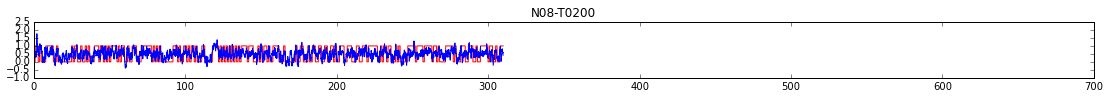

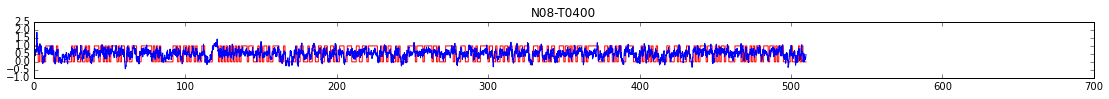

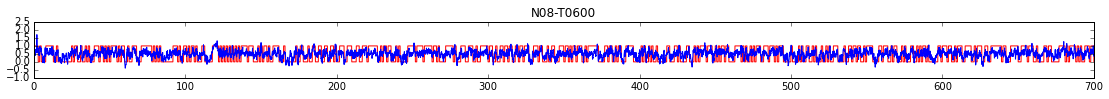

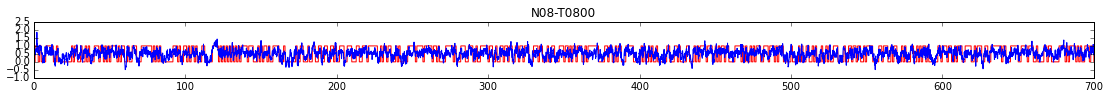

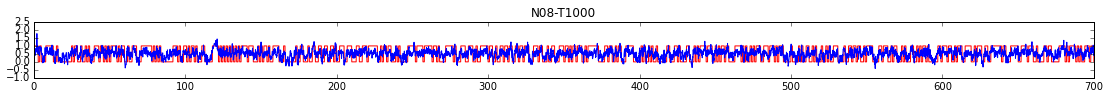

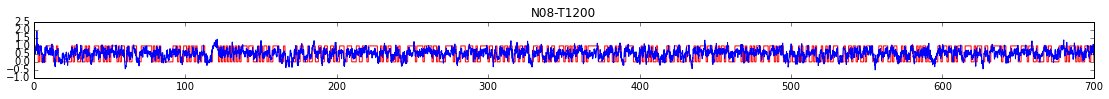

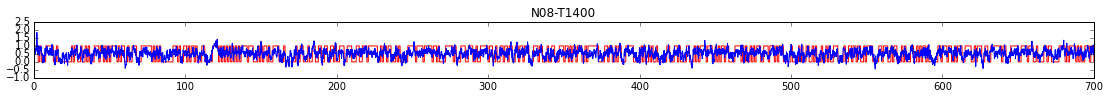

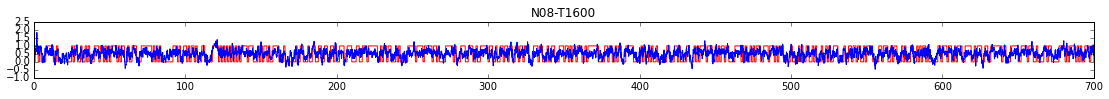

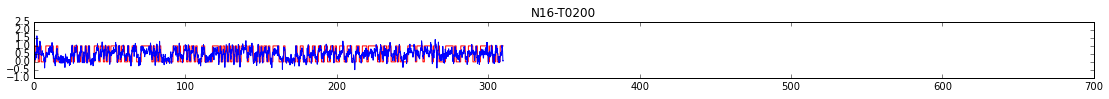

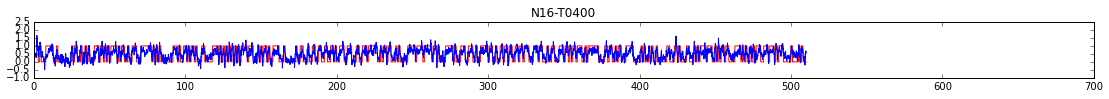

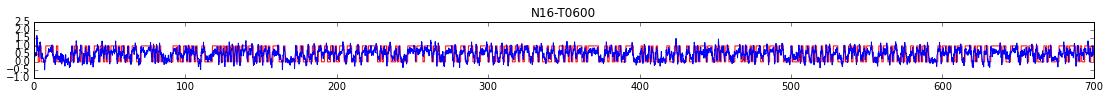

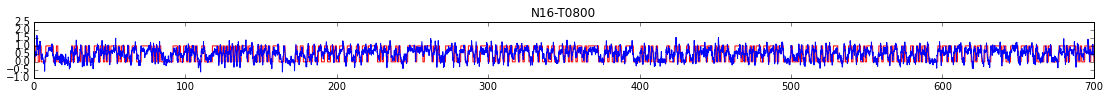

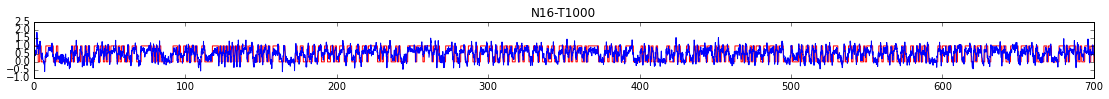

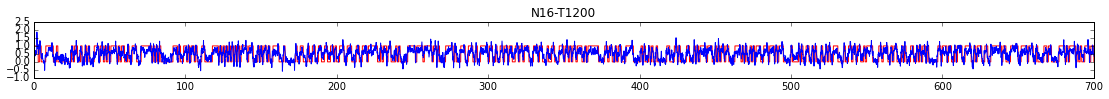

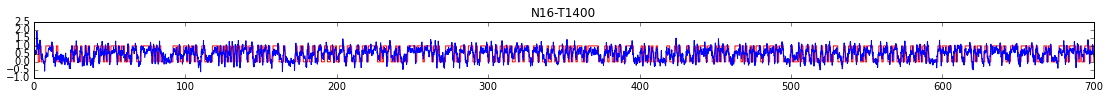

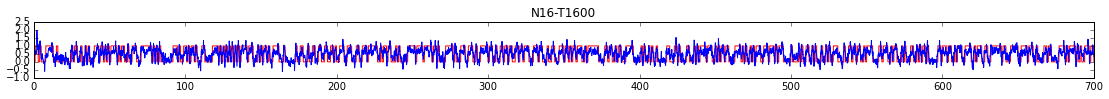

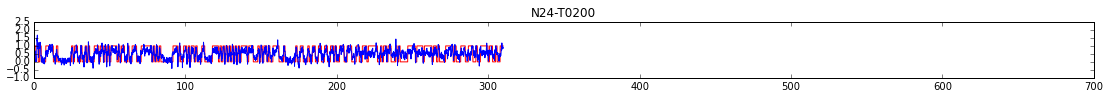

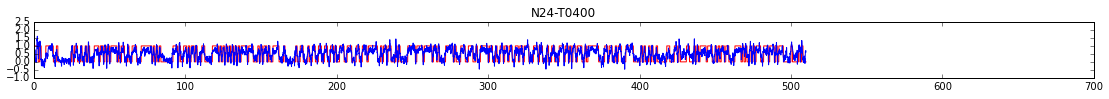

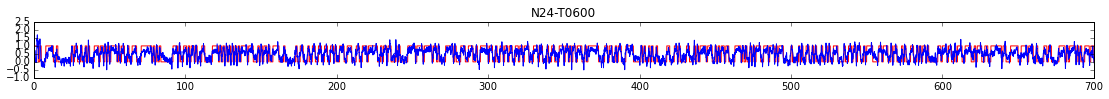

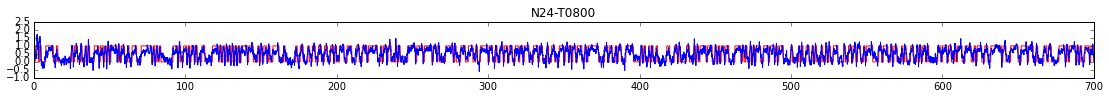

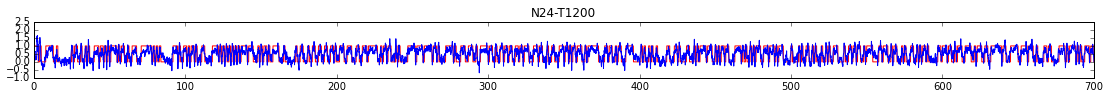

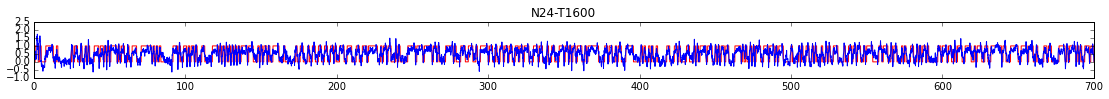

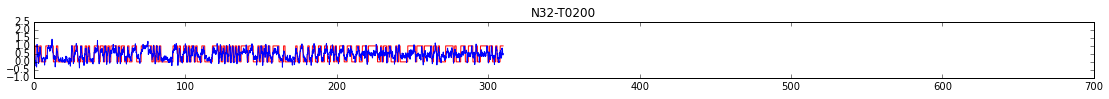

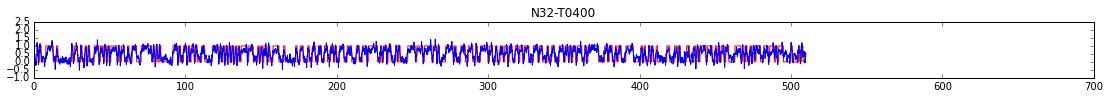

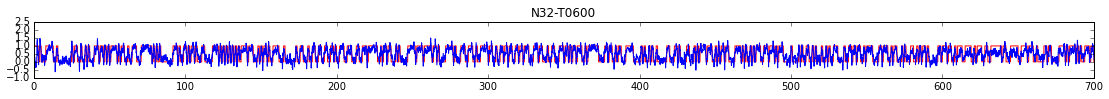

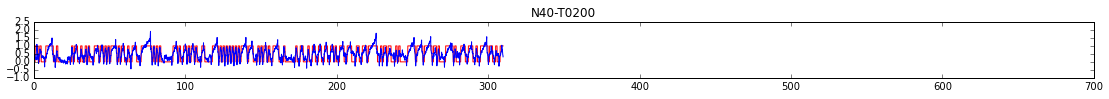

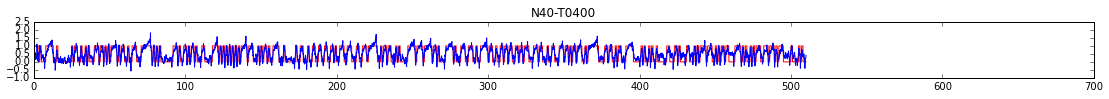

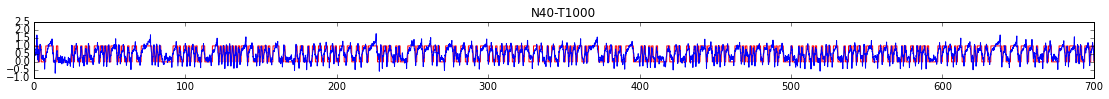

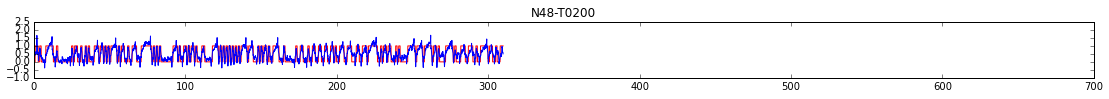

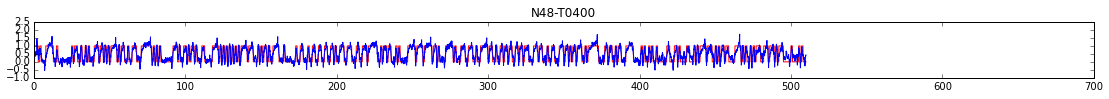

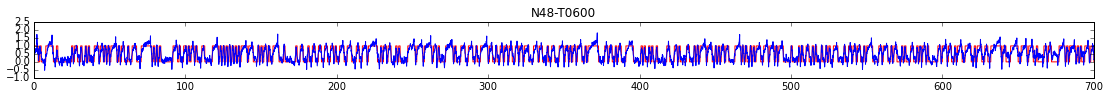

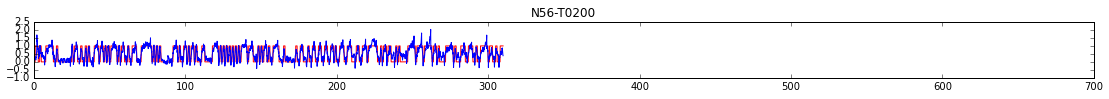

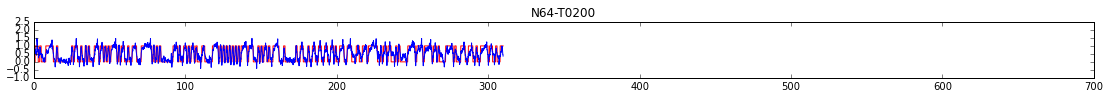

In [20]:
for time, out, target, name in zip(time_list, output_list, target_list, name_list):
    plt.figure(figsize = (19, 1))
    plt.title(name)
    plt.plot(time, target, 'r')
    plt.plot(time, out, 'b')
    plt.xlim(0, 700)
    plt.ylim(-1.0, 2.5)
    plt.show()

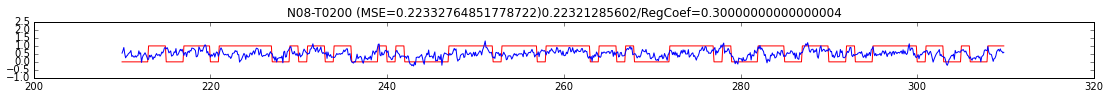

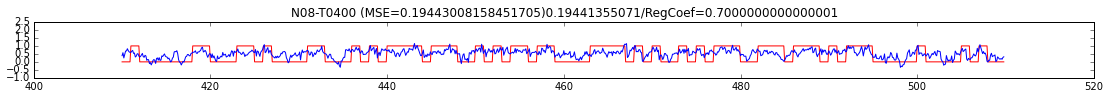

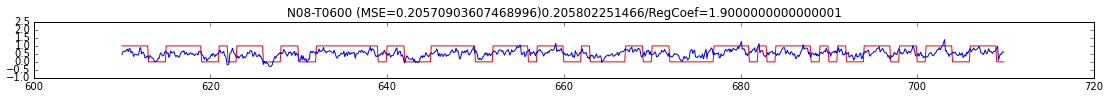

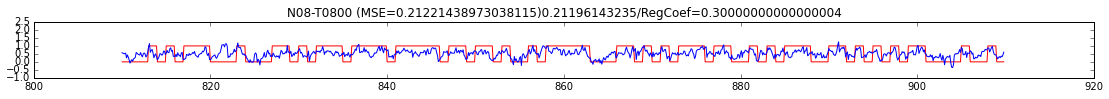

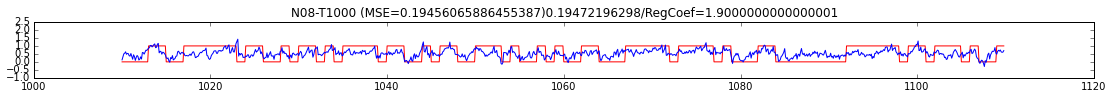

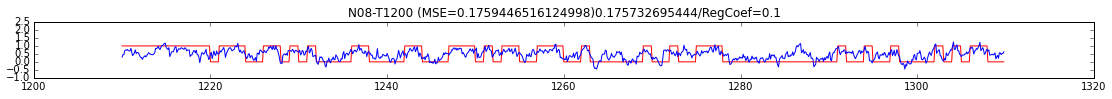

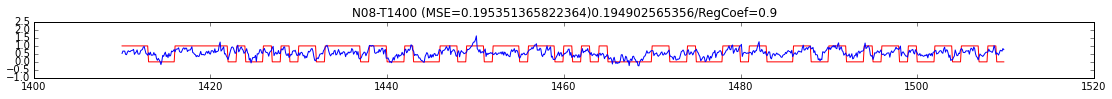

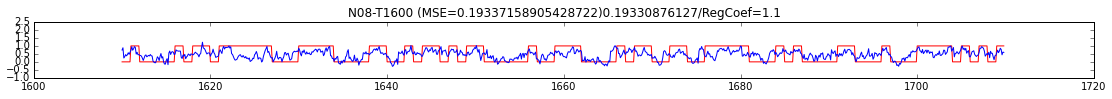

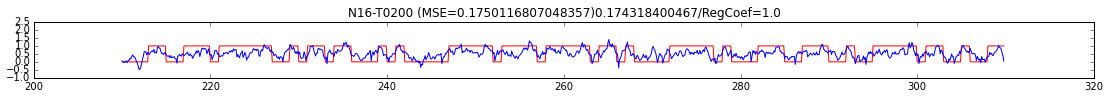

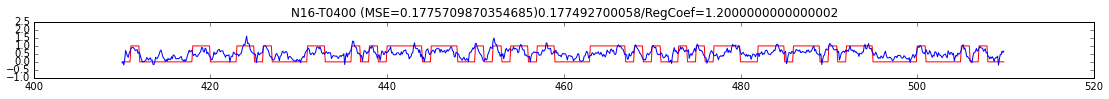

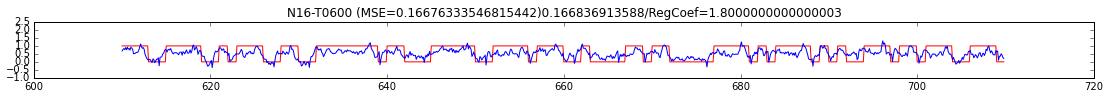

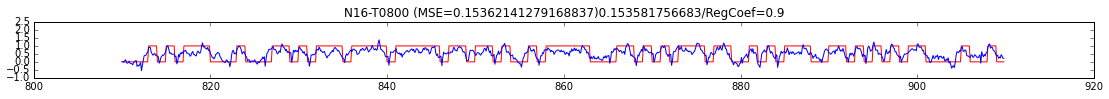

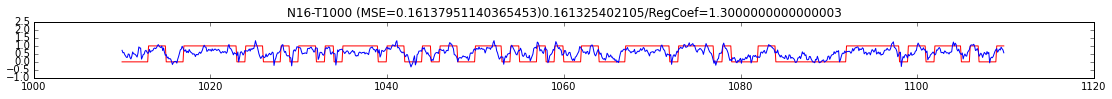

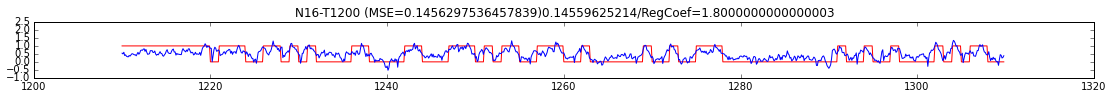

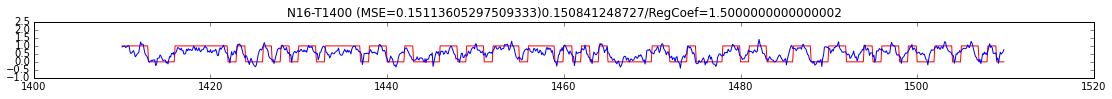

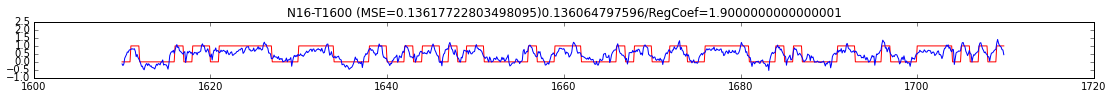

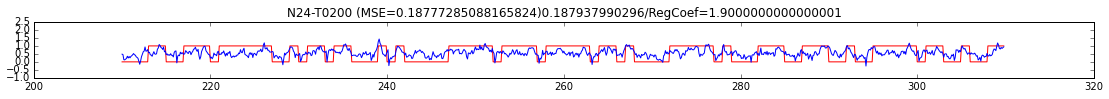

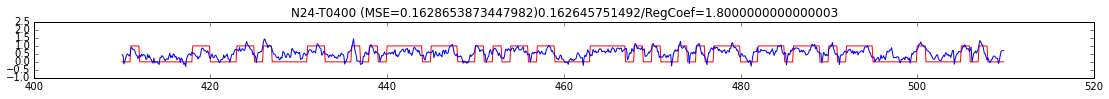

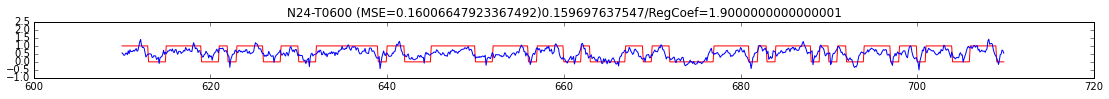

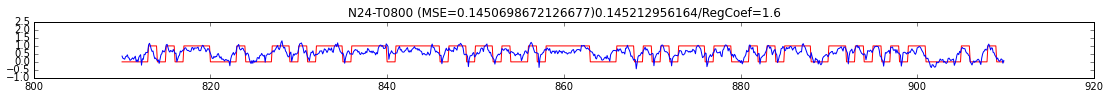

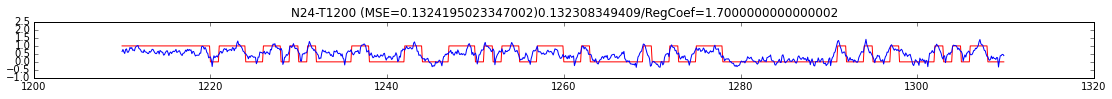

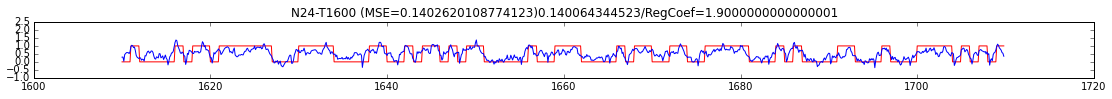

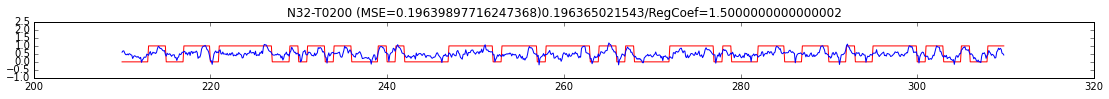

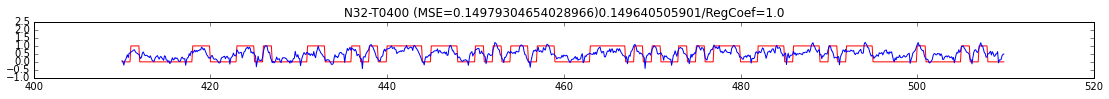

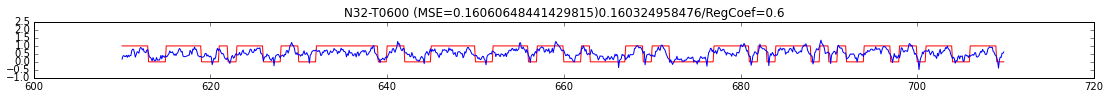

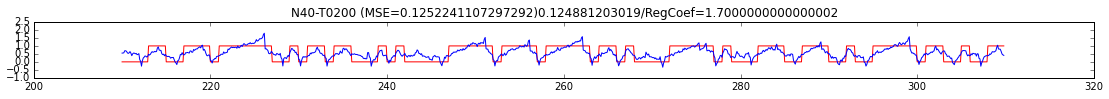

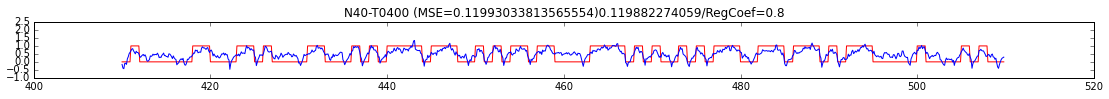

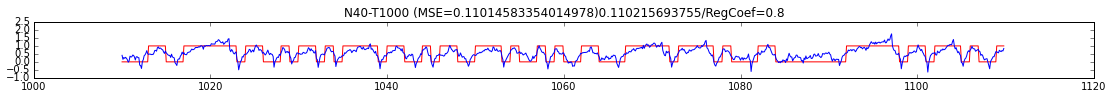

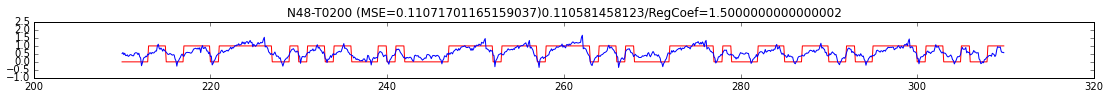

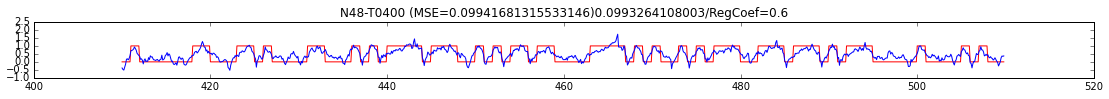

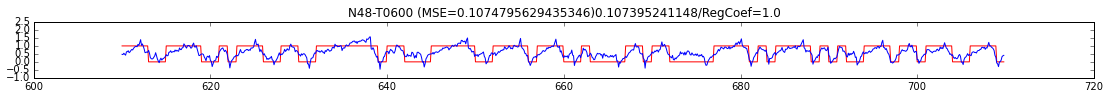

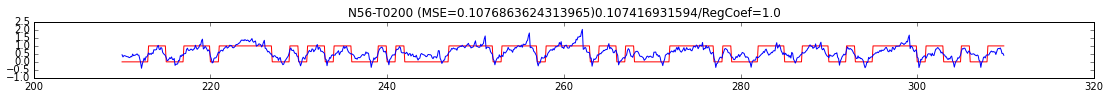

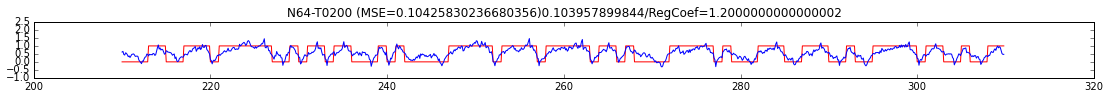

In [21]:
mse_list2 = []
for time, out, target, name, mse, regcoef in zip(time_list, output_list, target_list, name_list, mse_list, regcoef_list):
    time_s = time[-1000: -1]
    target_s = target[-1000: -1]
    out_s = out[-1000: -1]
    mse2 = calculate_mse(out_s, target_s)
    plt.figure(figsize = (19, 1))
    plt.title(name + " (MSE=" + str(mse) + ")" + str(mse2) + "/RegCoef=" + str(regcoef))
    plt.plot(time_s,  target_s, 'r')
    plt.plot(time_s, out_s, 'b')
    plt.ylim(-1.0, 2.5)
    plt.show()